<a href="https://colab.research.google.com/github/funmilayoobasa/2015-jupyter-notebook-survey/blob/main/Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Jupyter Notebook 2015 Survey Responses



Jupyter Notebook is a flexible web app that allows you to compute data.

For my first unguided data analysis project, I explored the responses from a 2015 Jupyter Notebook survey. 

This is the data set I used: https://www.kaggle.com/datasets/kaggle/2015-notebook-ux-survey. 



## Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textwrap import wrap
import matplotlib.mlab as mlab
import matplotlib
from matplotlib import figure
from google.colab import drive
drive.mount('/content/drive')

## Load Responses

In [15]:
survey = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/jup_survey_data.csv')
survey.shape

(1706, 37)

The survey has 1706 responses or rows and 37 columns.

In [16]:
pd.set_option('display.max_columns', None)
survey.head()

Time Started       Date Submitted    Status  \
0  2015-12-21 22:21:47  2015-12-21 22:21:51   Partial   
1  2015-12-22 00:03:36  2015-12-22 00:26:01  Complete   
2  2015-12-22 00:17:49  2015-12-22 00:17:49   Partial   
3  2015-12-22 00:22:07  2015-12-22 00:24:02   Partial   
4  2015-12-22 00:41:40  2015-12-22 00:42:09   Partial   

  How often do you use Jupyter Notebook?  \
0                                    NaN   
1                                  Daily   
2                                    NaN   
3                                  Daily   
4                                 Weekly   

  What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?  \
0                                                NaN                                                        
1  Ways to hide helper function definitions (or e...                                                        
2                                                NaN                                                        
3                                                NaN                                                        
4                                                NaN                                                        

  Roughly how long have you been using Jupyter Notebook?  \
0                                                NaN       
1                                 Less than one year       
2                                                NaN       
3                                   One year or more       
4                                   One year or more       

  Tool / Application #1:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?      \
0                                                NaN                                                                                    
1                                         sqlalchemy                                                                                    
2                                                NaN                                                                                    
3                 version control on notebooks (git)                                                                                    
4                                                NaN                                                                                    

  Tool / Application #2:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?      \
0                                                NaN                                                                                    
1  bokeh (or other JS/interactive plotting packages)                                                                                    
2                                                NaN                                                                                    
3                              publishing dashboards                                                                                    
4                                                NaN                                                                                    

  Tool / Application #3:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?      \
0                                                NaN                                                                                    
1  diff tool for changes in src (primarily for gi...                                                                                    
2                                                NaN                                                                                    
3                                 dockerised kernels                                                                                    
4                                                NaN   

**Now, let's inspect the data**

In [17]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 37 columns):
 #   Column                                                                                                                                                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                --------------  ----- 
 0   Time Started                                                                                                                                                                                                                                        

### How many participants completed the survey? 

Out of 1706 responses, only 779 (45.7%) responders completed the survey. For now, I will only work with the complete responses and drop the incomplete responses. 

Status  
Partial     54.3
Complete    45.7
dtype: float64

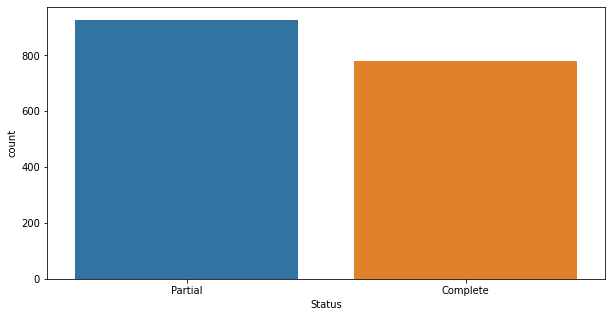

In [18]:
sns.countplot(data=survey, x='Status')
plt.rcParams['figure.figsize'] = (10,5)

round(survey[['Status']].value_counts() / 1706 * 100, 1)

In [13]:
# Drop incomplete 'Partial' completion of survey.

survey_complete = survey.loc[survey['Status'] == 'Complete']
survey_complete

Time Started       Date Submitted    Status  \
1     2015-12-22 00:03:36  2015-12-22 00:26:01  Complete   
5     2015-12-22 00:59:58  2015-12-22 01:03:39  Complete   
6     2015-12-22 01:12:07  2015-12-22 01:31:22  Complete   
7     2015-12-22 01:46:34  2015-12-22 02:18:37  Complete   
9     2015-12-22 03:28:15  2015-12-22 03:59:04  Complete   
...                   ...                  ...       ...   
1700  2016-01-14 14:40:59  2016-01-14 14:50:45  Complete   
1701  2016-01-14 17:07:10  2016-01-14 17:13:17  Complete   
1702  2016-01-14 18:07:49  2016-01-14 18:13:46  Complete   
1704  2016-01-15 07:06:38  2016-01-15 07:10:14  Complete   
1705  2016-01-15 11:02:10  2016-01-15 11:05:22  Complete   

     How often do you use Jupyter Notebook?  \
1                                     Daily   
5                                    Weekly   
6                                     Daily   
7                                    Weekly   
9                                     Daily   
...                                     ...   
1700                                  Daily   
1701                                  Daily   
1702                                  Daily   
1704                                 Weekly   
1705                                Monthly   

     What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?  \
1     Ways to hide helper function definitions (or e...                                                        
5                                              lazyness                                                        
6     Having to setup a Jupyter server in a particul...                                                        
7     - a standard option of converting the notebook...                                                        
9     Maybe figure out how to schedule automated exe...                                                        
...                                                 ...                                                        
1700                                                NaN                                                        
1701  Having an AWK specific version would be useful...                                                        
1702  Single window of browser Lack of integration w...                                                        
1704                                                NaN                                                        
1705                                                NaN                                                        

     Roughly how long have you been using Jupyter Notebook?  \
1                                    Less than one year       
5                                    Less than one year       
6                                      One year or more       
7                                      One year or more       
9                                      One year or more       
...                                                 ...       
1700                                   One year or more       
1701                                 Less than one year       
1702                                   One year or more       
1704                                 Less than one year       
1705                                   One year or more       

     Tool / Application #1:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?      \
1                                            sqlalchemy                                                                                    
5                                                   NaN                                                                                    
6                                   nbformat and Sphinx                                                                                    
7     sphinx, easier integration with blog framework...          

**How about duplicates. Does this dataset have any?** 

It's important to check if there are any duplicates. Including duplicates in the analysis can skew the data. 

In [19]:
survey_complete[survey_complete.duplicated()]

Empty DataFrame
Columns: [Time Started, Date Submitted, Status, How often do you use Jupyter Notebook?, What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?, Roughly how long have you been using Jupyter Notebook?, Tool / Application #1:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?    , Tool / Application #2:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?    , Tool / Application #3:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?    , How do you run the Jupyter Notebook?, Other - Write In:How do you run the Jupyter Notebook?, Workflow Need #1:What needs in your workflow does Jupyter Notebook address?, Workflow Need #2:What needs in your workflow does Jupyter Notebook address?, Workflow Need #3:What needs in your workflow does Jupyter Notebook address?, Workflow Need #1:What needs in your workflow does Jupyter Notebook not address?, Workflow Need #2:What needs in your workflow does Jupyter Notebook not address?, Workflow Need #3:What needs in your workflow does Jupyter Notebook not address?, Aspect #1:What aspects of Jupyter Notebook make it pleasant to use in your workflow?, Aspect #2:What aspects of Jupyter Notebook make it pleasant to use in your workflow?, Aspect #3:What aspects of Jupyter Notebook make it pleasant to use in your workflow?, Aspect #1:What aspects of Jupyter Notebook make it difficult to use in your workflow?, Aspect #2:What aspects of Jupyter Notebook make it difficult to use in your workflow?, Aspect #3:What aspects of Jupyter Notebook make it difficult to use in your workflow?, Feature / Change #1:What new features or changes would you like to see in Jupyter Notebook? (Please list anything that comes to mind that helps you in your workflow, big or small.), Feature / Change #2:What new features or changes would you like to see in Jupyter Notebook? (Please list anything that comes to mind that helps you in your workflow, big or small.), Feature / Change #3:What new features or changes would you like to see in Jupyter Notebook? (Please list anything that comes to mind that helps you in your workflow, big or small.), Enhancement #1:Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?, Enhancement #2:Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?, Enhancement #3:Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?, Select all the words that best describe Jupyter Notebook., Other word(s)::Select all the words that best describe Jupyter Notebook., What is your primary role when using Jupyter Notebook (e.g., student, astrophysicist, financial modeler, business manager, etc.)?, How many years have you been in this role? , Industry #1:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?, Industry #2:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?, Industry #3:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?, How many people typically see and/or interact with the results of your work in Jupyter Notebook? (Consider people who view your notebooks on nbviewer, colleagues who rerun your notebooks, developers who star your notebook repos on GitHub, audiences who see your notebooks as slideshows, etc.)]
Index: []

The search returned an empty table. THERE ARE NO DUPLICATES.

# What's going on with the Data?

## Here's what I found...

Out of 779 completed responses (45.66% of the data):

* Most particpants are: 
    * Data Scientists
    * Students 
    * Researchers
* They reside in the Research, Education and Finance industries.
* 49.0% of participants use Jupyter Notebook Daily. 
* 75.5% have been using it for more than a year. 
* 86.5% run Jupyter Notebook as a standalone app. 
    * Among the 7.6% of participants that chose to write their response, most use docker to run the app.
* 59.4% of participants have less than 10 people viewing their notebooks.


#### The Good
* For some, Jupyter Notebook is easy to use. 
* It is useful for data analysis and visualisation, markdown, and integrations. 
    * Despite its integration strength, most participants mentioned that they would like git, github, matplotlib, Vim, Emacs, etc to be tightly integrated with the tool.
* Its integration with python makes it pleasant to use. 
* 71.5% of participants think Jupyter Notebook is "convinient".


#### The Bad
* For some participants, Jupyter Notebook is difficult to use. It would have been nice if they received guidiance from:
    * Tutorials
    * Documentation
* Poor version control. This is a feature that users would like the Jupyter team to implement. 
* Using Jupyter Notebook in the browser makes it difficult to use. 
* It is not useful for debugging code. 

## Count Plots

In [27]:
def count_plot(data, column):
    
    '''create count plots and find percentage of values'''
    
    # Visualise as count plot
    ax = sns.countplot(data = data, x = column)
    ax.set_xlabel('\n'.join(wrap(column, 70)), fontsize = 16)
    plt.rcParams['figure.figsize'] = (15,5)
    
    #find % of values
    percentages = {'Count':data[[column]].value_counts(), 'Percentage':round(data[[column]].value_counts() / 779 * 100, 1)}
    perct_table = pd.DataFrame(percentages)
    return perct_table

### How often do you use Jupyter Notebook?

Count  Percentage
How often do you use Jupyter Notebook?                   
Daily                                     382        49.0
Weekly                                    280        35.9
Monthly                                    71         9.1
Less often than monthly                    40         5.1

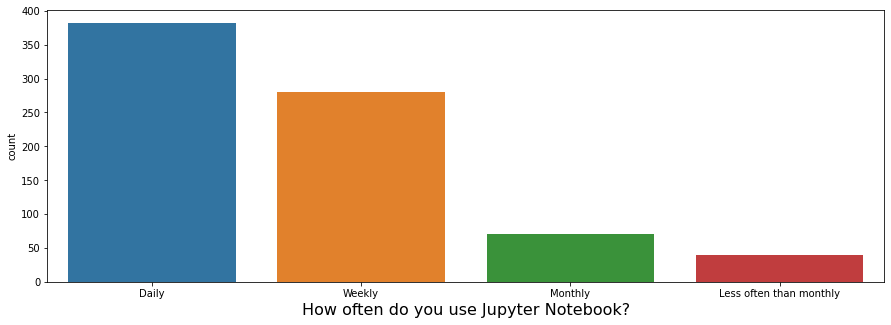

In [28]:
count_plot(survey_complete, 'How often do you use Jupyter Notebook?')

### Roughly how long have you been using Jupyter Notebook?

Count  Percentage
Roughly how long have you been using Jupyter No...                   
One year or more                                      588        75.5
Less than one year                                    183        23.5

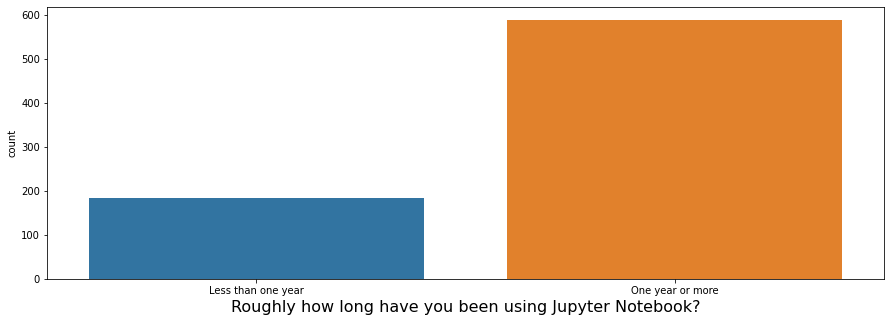

In [22]:
count_plot(survey_complete, 'Roughly how long have you been using Jupyter Notebook?')

### How do you run the Jupyter Notebook??

Count  Percentage
How do you run the Jupyter Notebook?                   
As a standalone application             674        86.5
Other - Write In                         59         7.6
Through Jupyter Hub                      35         4.5

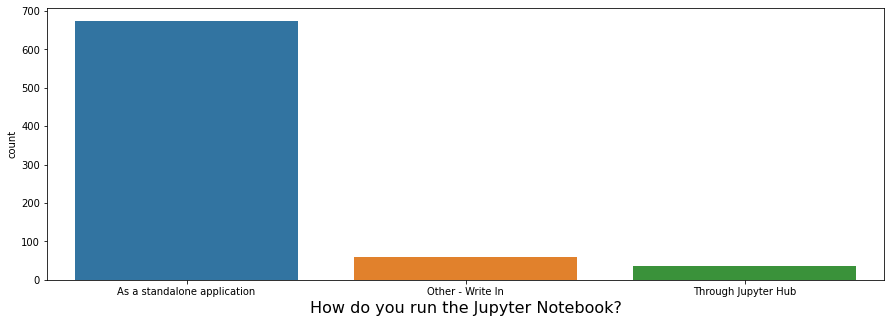

In [29]:
count_plot(survey_complete, 'How do you run the Jupyter Notebook?')

### Select all the words that best describe Jupyter Notebook.

Because this question allowed participants to select multiple options, I had to separate each response before visualising it. I am still searching for a better way to do this.

Count  Percentage
Select all the words that best describe Jupyter...                   
convenient                                            557        71.5
cool                                                  414        53.1
comfortable                                           396        50.8
quick                                                 365        46.9
intuitive                                             357        45.8
simple                                                348        44.7
flexible                                              346        44.4
accessible                                            283        36.3
Other word(s):                                         68         8.7
complicated                                            38         4.9
confusing                                              33         4.2
uncomfortable                                          29         3.7

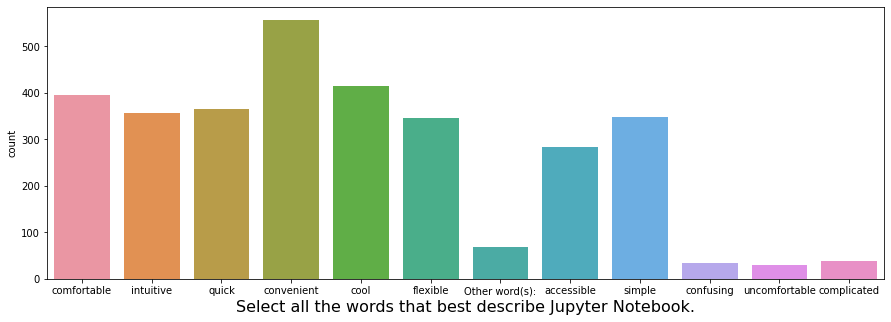

In [30]:
# separate responses
des_jup = survey_complete['Select all the words that best describe Jupyter Notebook.'].str.split(';').explode().astype('string')

# convert to dataframe 
des_jup = des_jup.to_frame()

# visualise responses
count_plot(des_jup, 'Select all the words that best describe Jupyter Notebook.')

### How many people typically see and/or interact with the results of your work in Jupyter Notebook? (Consider people who view your notebooks on nbviewer, colleagues who rerun your notebooks, developers who star your notebook repos on GitHub, audiences who see your notebooks as slideshows, etc.)

Count  Percentage
How many people typically see and/or interact w...                   
Under ten                                             463        59.4
Tens                                                  200        25.7
Hundreds                                               63         8.1
Thousands                                              14         1.8
Tens of thousands                                       4         0.5
Hundreds of thousands or more                           1         0.1

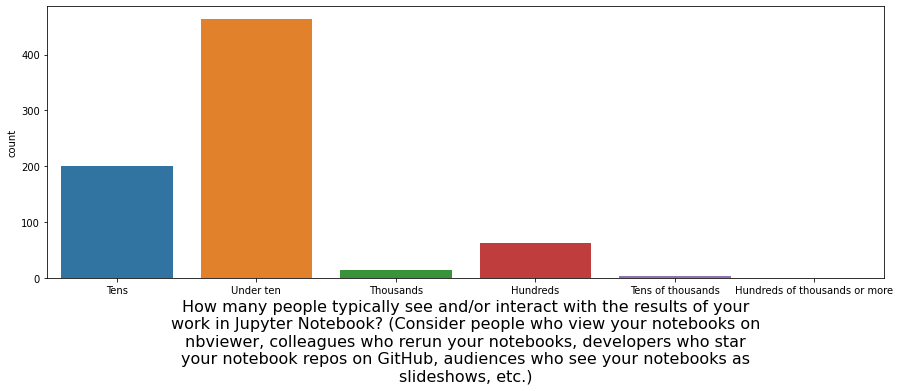

In [31]:
count_plot(survey_complete, 'How many people typically see and/or interact with the results of your work in Jupyter Notebook? (Consider people who view your notebooks on nbviewer, colleagues who rerun your notebooks, developers who star your notebook repos on GitHub, audiences who see your notebooks as slideshows, etc.)')

## Merging Columns and Generating Word Clouds

The unique thing about this dataset is that some questions were asked more than once. For example, the survey asked this question three times: "What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?". 

While a few columns did not need to be merged, majority reqiured merging. For those that needed merging, here's what I did:
* I merged the responses of split questions into one column. 
* I generated a wordcloud for the merged column.

In [32]:
def merge_cloud(new_col_name, *merge_col):
    
    '''merge columns (if needed) & generate word cloud'''
    
    global survey_complete
    
    survey_complete[new_col_name] = ''
    
    # convert needed columns to strings
    for col_items in merge_col:
        
        survey_complete[[col_items]].astype('string')

        # fill null values 
        survey_complete = survey_complete.fillna({col_items:'NaN'})
       
        # merge columns
        survey_complete[new_col_name] = survey_complete[new_col_name].str.cat(survey_complete[[col_items]], sep= ', ')
        
    
    # remove extra comma    
    survey_complete[new_col_name] = survey_complete[new_col_name].str[1:]
       
    
    # define variable for wordcloud
    text = ' '.join(value for value in survey_complete[new_col_name])
    
    # add stopwords
    stopwords = set(STOPWORDS)
    stopwords.update(['NaN', 'notebook'])
    
    # generate cloud
    cloud = WordCloud(stopwords = stopwords, background_color = 'white', colormap = 'Dark2_r', max_font_size = 80, width = 700, height = 250, max_words = 1000, random_state=42, relative_scaling= .5).generate(str(text))
    
    # visualise cloud
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad = 1)
    plt.rcParams['figure.figsize'] = (12,12)
    plt.title('\n'.join(wrap(new_col_name, 60)), fontdict = {'fontsize': 16}, pad = 15)
    plt.show()
    
    # return no. of words and words parsed
    return survey_complete[[new_col_name]]

### What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?

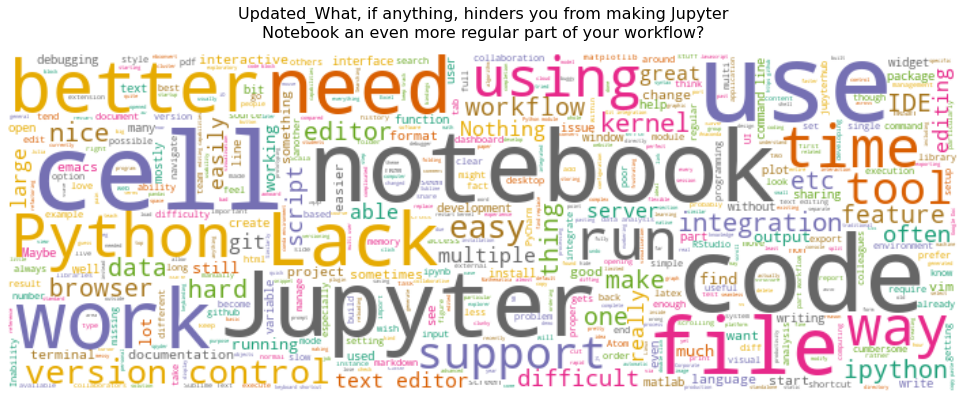

Updated_What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?
1      Ways to hide helper function definitions (or ...                                                             
5                                              lazyness                                                             
6      Having to setup a Jupyter server in a particu...                                                             
7      - a standard option of converting the noteboo...                                                             
9      Maybe figure out how to schedule automated ex...                                                             
...                                                 ...                                                             
1700                                                NaN                                                             
1701   Having an AWK specific version would be usefu...                                                             
1702   Single window of browser Lack of integration ...                                                             
1704                                                NaN                                                             
1705                                                NaN                                                             

[779 rows x 1 columns]

In [33]:
merge_cloud('Updated_What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?', 'What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?')

### Tool / Application 1-3:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?

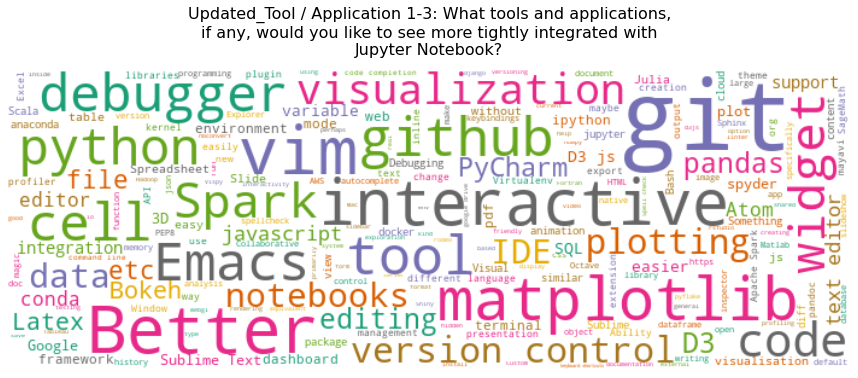

Updated_Tool / Application 1-3: What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?
1      sqlalchemy, bokeh (or other JS/interactive pl...                                                                                       
5                                         NaN, NaN, NaN                                                                                       
6      nbformat and Sphinx, binder.org, notebook to ...                                                                                       
7      sphinx, easier integration with blog framewor...                                                                                       
9      Continue and improve docker support, Interact...                                                                                       
...                                                 ...                                                                                       
1700   interactive data visualization, ui customizab...                                                                                       
1701              AWK, EXPECT , GITHUB integration/curl                                                                                       
1702   editor, version control , data sources explor...                                                                                       
1704                                      NaN, NaN, NaN                                                                                       
1705                    IntelliJ applications, NaN, NaN                                                                                       

[779 rows x 1 columns]

In [34]:
merge_cloud('Updated_Tool / Application 1-3: What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?', 'Tool / Application #1:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?    ', 'Tool / Application #2:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?    ', 'Tool / Application #3:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?    ')

### Other - Write In:How do you run the Jupyter Notebook?

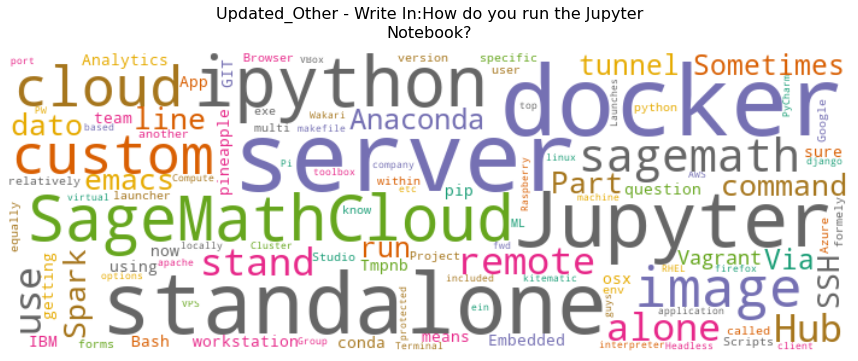

Updated_Other - Write In:How do you run the Jupyter Notebook?
1                                                   NaN           
5                                                   NaN           
6                                                   NaN           
7                                                   NaN           
9                        Tmpnb with custom docker image           
...                                                 ...           
1700                                                NaN           
1701                                                NaN           
1702                                                NaN           
1704                                                NaN           
1705                                                NaN           

[779 rows x 1 columns]

In [35]:
merge_cloud('Updated_Other - Write In:How do you run the Jupyter Notebook?', 'Other - Write In:How do you run the Jupyter Notebook?')

### Workflow Need 1-3: What needs in your workflow does Jupyter Notebook address?

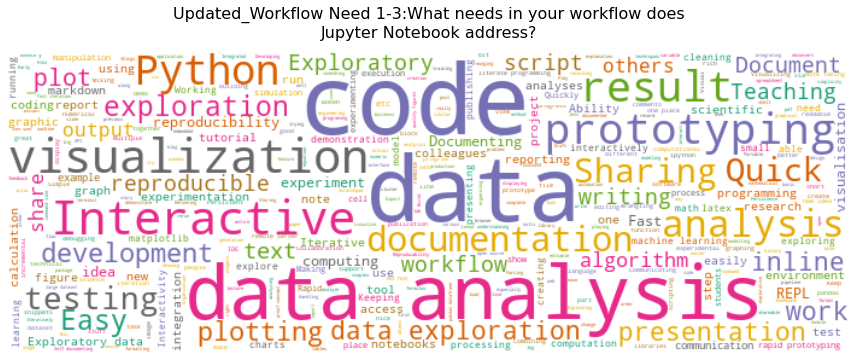

Updated_Workflow Need 1-3:What needs in your workflow does Jupyter Notebook address?
1      prototyping, while keeping previous results i...                                  
5                data analysis, data visualization, NaN                                  
6      Exploratory analysis and documentation, model...                                  
7         data analysis, writing reports, visualisation                                  
9      Deployment of custom versioned code, Distribu...                                  
...                                                 ...                                  
1700   exploratory (scientific) data analysis, incre...                                  
1701   Notes for work, Notes for business, Notes for...                                  
1702   place to interactively run python code, view ...                                  
1704   Interactive computing, Interactive creation o...                                  
1705              stateful Python programming, NaN, NaN                                  

[779 rows x 1 columns]

In [36]:
merge_cloud('Updated_Workflow Need 1-3:What needs in your workflow does Jupyter Notebook address?', 'Workflow Need #1:What needs in your workflow does Jupyter Notebook address?', 'Workflow Need #2:What needs in your workflow does Jupyter Notebook address?', 'Workflow Need #3:What needs in your workflow does Jupyter Notebook address?')


### Workflow Need 1-3: What needs in your workflow does Jupyter Notebook not address?

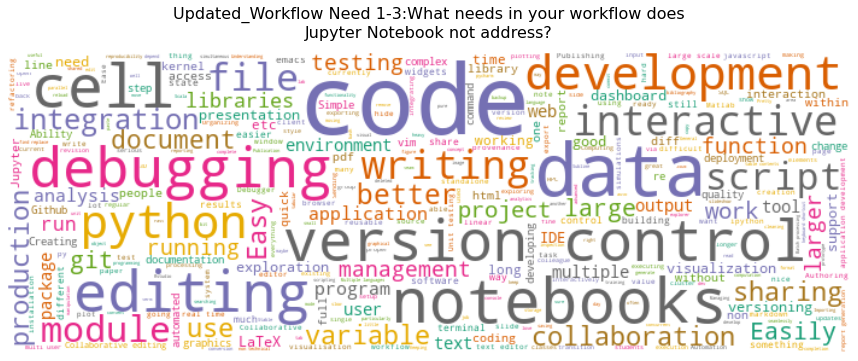

Updated_Workflow Need 1-3:What needs in your workflow does Jupyter Notebook not address?
1      clearer ways to be able to interact with plot...                                      
5      interactive data visualization, concurrent te...                                      
6      Organizing content, notebook to slide present...                                      
7       interactive dashboards, version management, NaN                                      
9      Scheduling scripts (data acquisition, cleanin...                                      
...                                                 ...                                      
1700   sharing of pipelines, output must be copy-pas...                                      
1701                                 business, NaN, NaN                                      
1702                       project management, NaN, NaN                                      
1704                                      NaN, NaN, NaN                                      
1705                                      NaN, NaN, NaN                                      

[779 rows x 1 columns]

In [37]:
merge_cloud('Updated_Workflow Need 1-3:What needs in your workflow does Jupyter Notebook not address?', 'Workflow Need #1:What needs in your workflow does Jupyter Notebook not address?', 'Workflow Need #2:What needs in your workflow does Jupyter Notebook not address?', 'Workflow Need #3:What needs in your workflow does Jupyter Notebook not address?')

### Aspect 1-3: What aspects of Jupyter Notebook make it pleasant to use in your workflow?

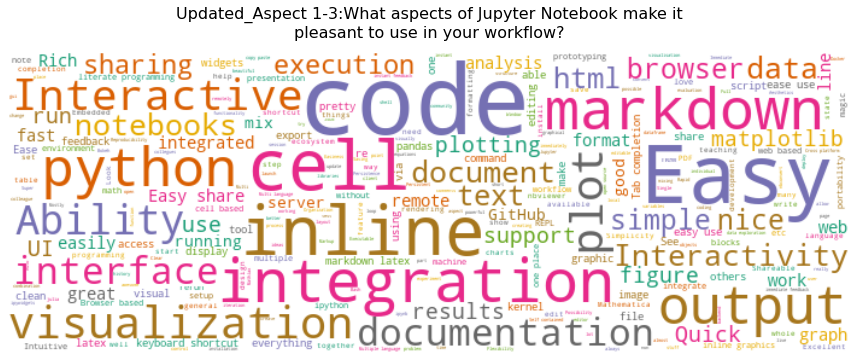

Updated_Aspect 1-3:What aspects of Jupyter Notebook make it pleasant to use in your workflow?
1      ipywidgets, hotkeys in general, restart kerne...                                           
5      notes/code/figures all in one place, python i...                                           
6      Mix of text, math, code and plots, ipywidgets...                                           
7      interactivity, integration of analysis and re...                                           
9      Mostly stateless, Docker, Full Python functio...                                           
...                                                 ...                                           
1700   code output is immediately below the code, Na...                                           
1701   Notes plus live execution, Standardization, E...                                           
1702                          code completion, NaN, NaN                                           
1704   Very fast, Very flexible and versatile becaus...                                           
1705                                      NaN, NaN, NaN                                           

[779 rows x 1 columns]

In [38]:
merge_cloud('Updated_Aspect 1-3:What aspects of Jupyter Notebook make it pleasant to use in your workflow?', 'Aspect #1:What aspects of Jupyter Notebook make it pleasant to use in your workflow?', 'Aspect #2:What aspects of Jupyter Notebook make it pleasant to use in your workflow?', 'Aspect #3:What aspects of Jupyter Notebook make it pleasant to use in your workflow?')

### Aspect 1-3: What aspects of Jupyter Notebook make it difficult to use in your workflow?

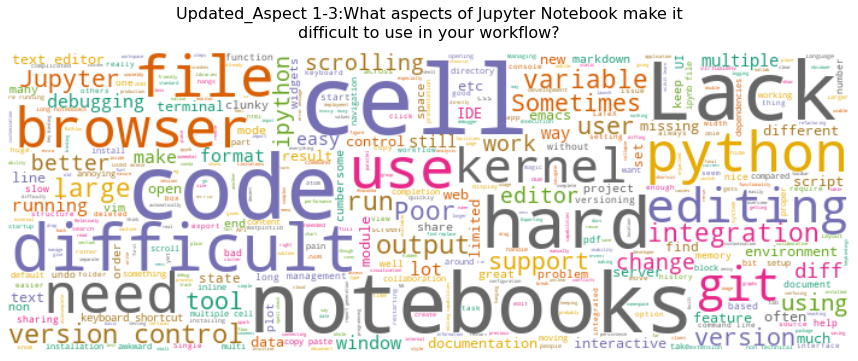

Updated_Aspect 1-3:What aspects of Jupyter Notebook make it difficult to use in your workflow?
1      difficult to diff changes, especially with la...                                            
5      no concurrent terminal with all workspace var...                                            
6         laborious to startup, no version control, NaN                                            
7            report generation, version management, NaN                                            
9                                         NaN, NaN, NaN                                            
...                                                 ...                                            
1700   version control, code reuse in different note...                                            
1701                                      NaN, NaN, NaN                                            
1702   hard to startup (command line, not app), hard...                                            
1704                                      NaN, NaN, NaN                                            
1705   couldn't figure out how to use CRUD features ...                                            

[779 rows x 1 columns]

In [39]:
merge_cloud('Updated_Aspect 1-3:What aspects of Jupyter Notebook make it difficult to use in your workflow?', 'Aspect #1:What aspects of Jupyter Notebook make it difficult to use in your workflow?', 'Aspect #2:What aspects of Jupyter Notebook make it difficult to use in your workflow?', 'Aspect #3:What aspects of Jupyter Notebook make it difficult to use in your workflow?')

### Feature / Change 1-3: What new features or changes would you like to see in Jupyter Notebook? (Please list anything that comes to mind that helps you in your workflow, big or small.)

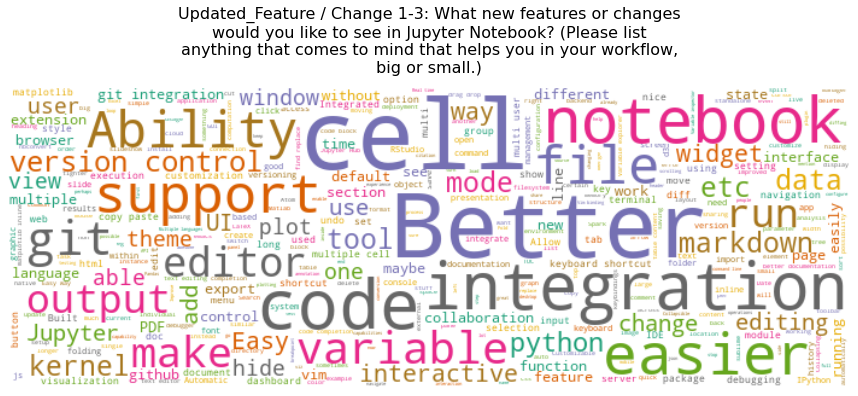

Updated_Feature / Change 1-3: What new features or changes would you like to see in Jupyter Notebook? (Please list anything that comes to mind that helps you in your workflow, big or small.)
1       command line diff of source (for git), NaN, NaN                                                                                                                                            
5      concurrent terminal with all workspace variab...                                                                                                                                            
6      Turn notebook into slideshow more easily (bet...                                                                                                                                            
7      building reports (e.g. knitr), building dashb...                                                                                                                                            
9      API to interact with notebooks and servers, N...                                                                                                                                            
...                                                 ...                                                                                                                                            
1700   easier version control, limit output # of lin...                                                                                                                                            
1701                                      NaN, NaN, NaN                                                                                                                                            
1702                          native app icon, NaN, NaN                                                                                                                                            
1704                                      NaN, NaN, NaN                                                                                                                                            
1705                                      NaN, NaN, NaN                                                                                                                                            

[779 rows x 1 columns]

In [40]:
merge_cloud('Updated_Feature / Change 1-3: What new features or changes would you like to see in Jupyter Notebook? (Please list anything that comes to mind that helps you in your workflow, big or small.)', 'Feature / Change #1:What new features or changes would you like to see in Jupyter Notebook? (Please list anything that comes to mind that helps you in your workflow, big or small.)', 'Feature / Change #2:What new features or changes would you like to see in Jupyter Notebook? (Please list anything that comes to mind that helps you in your workflow, big or small.)', 'Feature / Change #3:What new features or changes would you like to see in Jupyter Notebook? (Please list anything that comes to mind that helps you in your workflow, big or small.)')

### Enhancement 1-3:  Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?

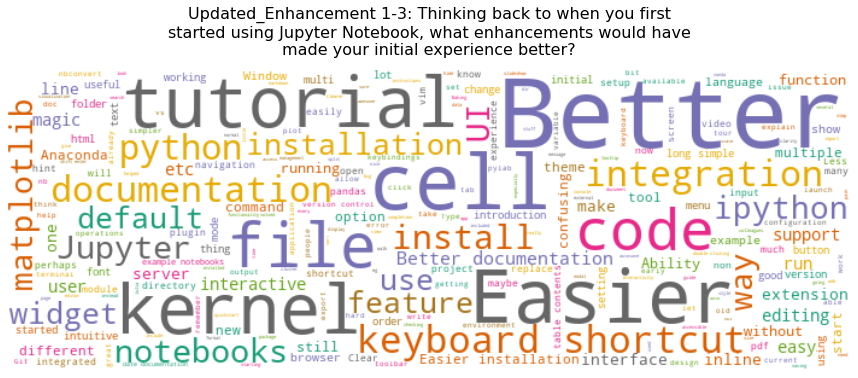

Updated_Enhancement 1-3: Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?
1      better ipywidgets documentation, easier callb...                                                                                                        
5                                         NaN, NaN, NaN                                                                                                        
6      Open from any folder, notebook preview in Fil...                                                                                                        
7      ease in setting up Jupyter with different lan...                                                                                                        
9      The project is huge, in functionality, in pot...                                                                                                        
...                                                 ...                                                                                                        
1700   show current execution count somewhere in men...                                                                                                        
1701                      Not Python Specific, NaN, NaN                                                                                                        
1702                                      NaN, NaN, NaN                                                                                                        
1704                                      NaN, NaN, NaN                                                                                                        
1705                                      NaN, NaN, NaN                                                                                                        

[779 rows x 1 columns]

In [41]:
merge_cloud('Updated_Enhancement 1-3: Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?', 'Enhancement #1:Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?', 'Enhancement #2:Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?', 'Enhancement #3:Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?')

### Other word(s)::Select all the words that best describe Jupyter Notebook.

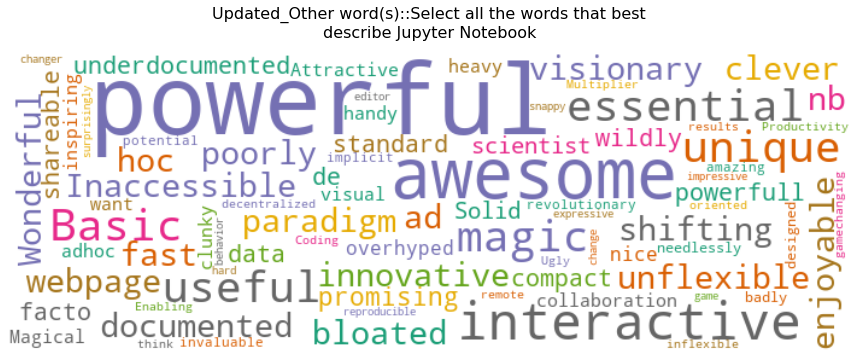

Updated_Other word(s)::Select all the words that best describe Jupyter Notebook
1                                                   NaN                             
5                                                   NaN                             
6                                     paradigm shifting                             
7                                                   NaN                             
9                                                   NaN                             
...                                                 ...                             
1700                                                NaN                             
1701                                                NaN                             
1702                              surprisingly powerful                             
1704                                                NaN                             
1705                                                NaN                             

[779 rows x 1 columns]

In [42]:
merge_cloud('Updated_Other word(s)::Select all the words that best describe Jupyter Notebook', 'Other word(s)::Select all the words that best describe Jupyter Notebook.')

### What is your primary role when using Jupyter Notebook (e.g., student, astrophysicist, financial modeler, business manager, etc.)?.

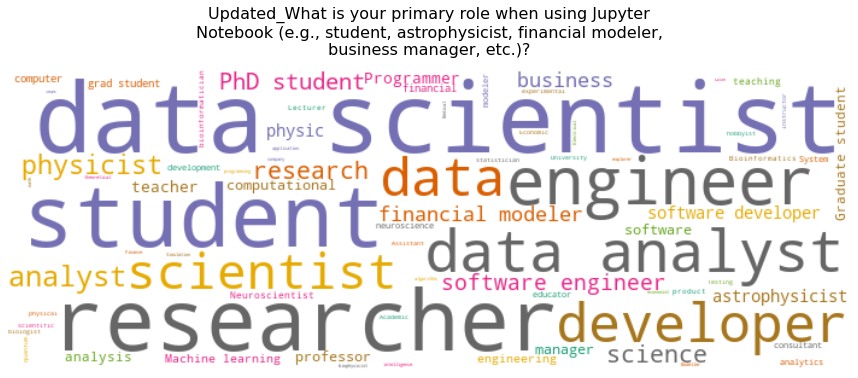

Updated_What is your primary role when using Jupyter Notebook (e.g., student, astrophysicist, financial modeler, business manager, etc.)?
1             grad student (computational astrophysics)                                                                                       
5                                physical oceanographer                                                                                       
6            Economics researcher, University professor                                                                                       
7                       data analyst, financial modeler                                                                                       
9         Developer in research oriented energy company                                                                                       
...                                                 ...                                                                                       
1700                                   bioinformatician                                                                                       
1701                     automation testing/development                                                                                       
1702                           data scientist / analyst                                                                                       
1704                                        PhD student                                                                                       
1705       software engineering doing R&D, prototypying                                                                                       

[779 rows x 1 columns]

In [43]:
merge_cloud('Updated_What is your primary role when using Jupyter Notebook (e.g., student, astrophysicist, financial modeler, business manager, etc.)?', 'What is your primary role when using Jupyter Notebook (e.g., student, astrophysicist, financial modeler, business manager, etc.)?')

### Industry 1-3: What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?

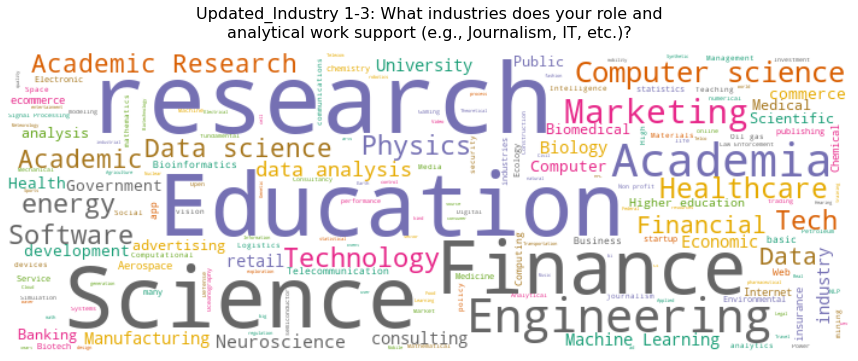

Updated_Industry 1-3: What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?
1                            academic science, NaN, NaN                                                            
5                              Research, Education, NaN                                                            
6           Academic Economics Research, Education, NaN                                                            
7                                   insurance, NaN, NaN                                                            
9                              Energy, Consultancy, NaN                                                            
...                                                 ...                                                            
1700                            Life Sciences, NaN, NaN                                                            
1701                IT, Telecommunication Dev, Business                                                            
1702                                   travel, NaN, NaN                                                            
1704                                 Research, NaN, NaN                                                            
1705                     education technology, NaN, NaN                                                            

[779 rows x 1 columns]

In [44]:
merge_cloud('Updated_Industry 1-3: What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?', 'Industry #1:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?', 'Industry #2:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?', 'Industry #3:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?')

## Incase you missed my findings...

Out of 779 completed responses (45.66% of the data):

* Most particpants are: 
    * Data Scientists
    * Students 
    * Researchers
* They reside in the Research, Education and Finance industries.
* 49.0% of participants use Jupyter Notebook Daily. 
* 75.5% have been using it for more than a year. 
* 86.5% run Jupyter Notebook as a standalone app. 
    * Among the 7.6% of participants that chose to write their response, most use docker to run the app.
* 59.4% of participants have less than 10 people viewing their notebooks.


#### The Good
* For some, Jupyter Notebook is easy to use. 
* It is useful for data analysis and visualisation, markdown, and integrations. 
    * Despite its integration strength, most participants mentioned that they would like git, github, matplotlib, Vim, Emacs, etc to be tightly integrated with the tool.
* Its integration with python makes it pleasant to use. 
* 71.5% of participants think Jupyter Notebook is "convinient".


#### The Bad
* For some participants, Jupyter Notebook is difficult to use. It would have been nice if they received guidiance from:
    * Tutorials
    * Documentation
* Poor version control. This is a feature that users would like the Jupyter team to implement. 
* Using Jupyter Notebook in the browser makes it difficult to use. 
* It is not useful for debugging code. 

# Updated Table

In [45]:
survey_complete.head()

Time Started       Date Submitted    Status  \
1  2015-12-22 00:03:36  2015-12-22 00:26:01  Complete   
5  2015-12-22 00:59:58  2015-12-22 01:03:39  Complete   
6  2015-12-22 01:12:07  2015-12-22 01:31:22  Complete   
7  2015-12-22 01:46:34  2015-12-22 02:18:37  Complete   
9  2015-12-22 03:28:15  2015-12-22 03:59:04  Complete   

  How often do you use Jupyter Notebook?  \
1                                  Daily   
5                                 Weekly   
6                                  Daily   
7                                 Weekly   
9                                  Daily   

  What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?  \
1  Ways to hide helper function definitions (or e...                                                        
5                                           lazyness                                                        
6  Having to setup a Jupyter server in a particul...                                                        
7  - a standard option of converting the notebook...                                                        
9  Maybe figure out how to schedule automated exe...                                                        

  Roughly how long have you been using Jupyter Notebook?  \
1                                 Less than one year       
5                                 Less than one year       
6                                   One year or more       
7                                   One year or more       
9                                   One year or more       

  Tool / Application #1:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?      \
1                                         sqlalchemy                                                                                    
5                                                NaN                                                                                    
6                                nbformat and Sphinx                                                                                    
7  sphinx, easier integration with blog framework...                                                                                    
9                Continue and improve docker support                                                                                    

  Tool / Application #2:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?      \
1  bokeh (or other JS/interactive plotting packages)                                                                                    
5                                                NaN                                                                                    
6                                         binder.org                                                                                    
7  flowbased programming (e.g. phantomx : http://...                                                                                    
9   Interactive data visualisation for huge datasets                                                                                    

  Tool / Application #3:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?      \
1  diff tool for changes in src (primarily for gi...                                                                                    
5                                                NaN                                                                                    
6                                 notebook to slides                                                                                    
7                 a dashboard framework (e.g. shiny)                                                                                    
9  Orchestration api to run notebooks, get cell r...   

# What Next?

This is not perfect. It isn't even remotely close to perfect, but the process was worthwhile. I will appreciate any form of feedback you have to give. 